<a href="https://colab.research.google.com/github/Tahir-MD/SynTecxHub_ML_Intership_Week_01/blob/main/SynTecxHub_week2_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.iloc[:, :2]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()
df.describe()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


,count
label,
ham,4825
spam,747


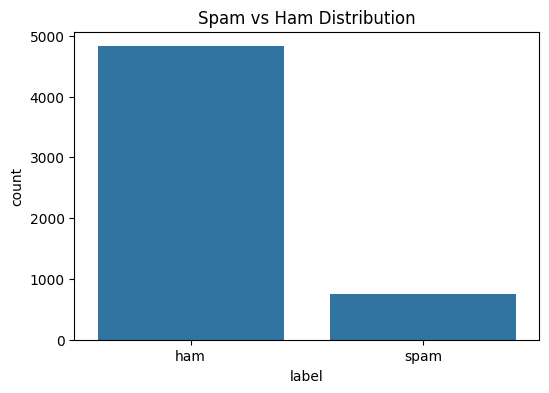

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

In [5]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.split()
    text = [ps.stem(word) for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

df['clean_message'] = df['message'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,label,message,label_num,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though


In [6]:
from sklearn.model_selection import train_test_split

X = df['clean_message']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 4457
Testing samples: 1115


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

tfidf = TfidfVectorizer(max_features=5000)
nb = MultinomialNB()

pipeline_nb = Pipeline([
    ('tfidf', tfidf),
    ('nb', nb)
])

pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

pipeline_lr = Pipeline([
    ('tfidf', tfidf),
    ('lr', lr)
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_nb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_nb, target_names=['Ham', 'Spam'])}")

print("\n" + "="*50 + "\n")

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr, target_names=['Ham', 'Spam'])}")

Naive Bayes Results:
Accuracy: 0.9677
Confusion Matrix:
[[965   1]
 [ 35 114]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       966
        Spam       0.99      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



Logistic Regression Results:
Accuracy: 0.9695
Confusion Matrix:
[[965   1]
 [ 33 116]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       0.99      0.78      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



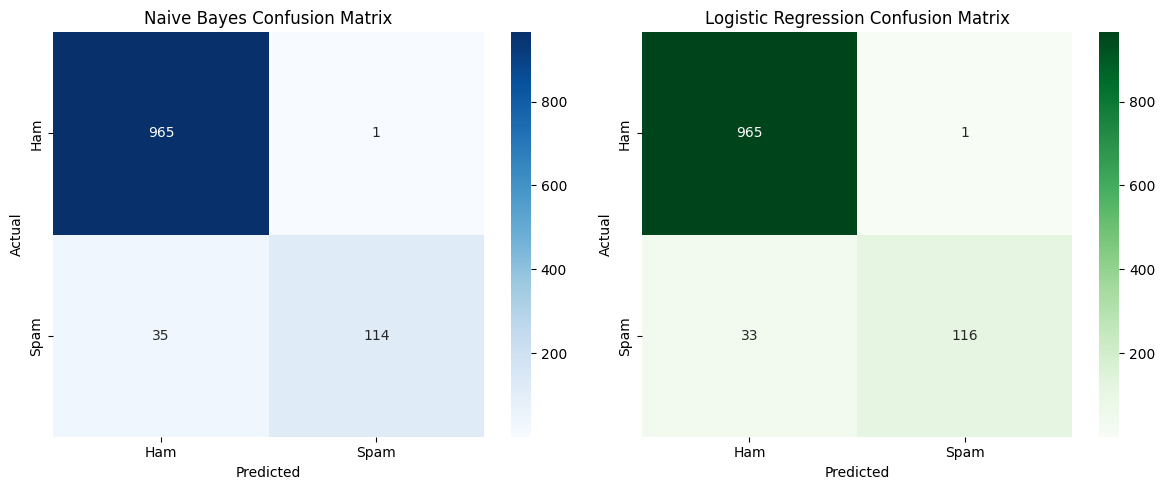

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[0].set_title('Naive Bayes Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=axes[1], xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
axes[1].set_title('Logistic Regression Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [11]:
best_model = pipeline_lr if accuracy_score(y_test, y_pred_lr) > accuracy_score(y_test, y_pred_nb) else pipeline_nb
print(f"Best model selected: {'Logistic Regression' if best_model == pipeline_lr else 'Naive Bayes'}")

Best model selected: Logistic Regression


In [12]:
import joblib

joblib.dump(best_model, 'spam_detection_pipeline.pkl')
print("Model saved as 'spam_detection_pipeline.pkl'")

Model saved as 'spam_detection_pipeline.pkl'


In [13]:
loaded_model = joblib.load('spam_detection_pipeline.pkl')

def predict_message(text):
    result = loaded_model.predict([text])[0]
    return "Spam" if result == 1 else "Ham"

test_messages = [
    "Congratulations! You've won a free iPhone. Click here to claim your prize now!",
    "Hey, are we still meeting for coffee tomorrow?",
    "URGENT: Your account has been suspended. Verify immediately to restore access.",
    "Can you pick up some milk on your way home?",
    "FREE MONEY!!! Make $1000 per day from home!!!"
]

for msg in test_messages:
    print(f"Message: {msg[:50]}...")
    print(f"Prediction: {predict_message(msg)}")
    print("-" * 70)

Message: Congratulations! You've won a free iPhone. Click h...
Prediction: Spam
----------------------------------------------------------------------
Message: Hey, are we still meeting for coffee tomorrow?...
Prediction: Ham
----------------------------------------------------------------------
Message: URGENT: Your account has been suspended. Verify im...
Prediction: Ham
----------------------------------------------------------------------
Message: Can you pick up some milk on your way home?...
Prediction: Ham
----------------------------------------------------------------------
Message: FREE MONEY!!! Make $1000 per day from home!!!...
Prediction: Ham
----------------------------------------------------------------------


In [14]:
def interactive_spam_detector():
    print("=" * 50)
    print("SPAM DETECTOR CLI")
    print("=" * 50)
    print("Type 'quit' to exit\n")

    while True:
        user_input = input("Enter your message: ")

        if user_input.lower() == 'quit':
            print("Goodbye!")
            break

        result = predict_message(user_input)
        print(f"\n{'='*50}")
        print(f"MESSAGE: {user_input}")
        print(f"PREDICTION: {result}")
        print(f"{'='*50}\n")

interactive_spam_detector()

SPAM DETECTOR CLI
Type 'quit' to exit

Enter your message: You won the iphone. Contact on this number for more details

MESSAGE: You won the iphone. Contact on this number for more details
PREDICTION: Ham

Enter your message: quit
Goodbye!
